<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html hw5.do.txt --no_mako -->
<!-- dom:TITLE: PHY321: Classical Mechanics 1 -->

# Solution Homework 5

**Spring 2025**

In [1]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.style.use('seaborn-v0_8-colorblind')

### Exercise 1 (10 pt), SHO and Conservation of Energy

Consider the standard harmonic oscillator with a mass $m$ attached to a horizontal spring with spring constant $k$. It is constrained to move in the $x$ direction only and there is no friction present. With the equilibrium position as $x=0$, then the potential energy is $U(x)=\frac{1}{2}kx^2$.

We give the oscillator a little kick at $t=0$ and let it go. It reaches a maximum distance of $A$ from the equilibrium position.

* 1a (2pt) Write down the conservation of energy equation and find the velocity as a function of position (i.e., find $\dot{x}(x)$).

```{admonition} Solution
:class: tip

The energy conservation equation is quite simply:

$$E = K + U = \frac{1}{2}m\dot{x}^2 + \frac{1}{2}kx^2 = \text{constant}$$

The constant is set by the fact that the mass reaches a maximum distance of $A$,

$$E = \frac{1}{2}kA^2.$$

Thus, we can solve for $\dot{x}(x)$,

$$E = \frac{1}{2}kA^2 = \frac{1}{2}m\dot{x}^2 + \frac{1}{2}kx^2,$$
$$\frac{1}{2}m\dot{x}^2 = \frac{1}{2}k(A^2 - x^2),$$
$$\dot{x} = \pm \sqrt{\frac{k}{m}(A^2 - x^2)}.$$
```


* 1b (4pt) Construct the integral for the time it takes for the oscillator from $x=0$ to any position $x$.

```{admonition} Solution
:class: tip

We use the prior result to find the time it takes to go from $x=0$ to $x$. Here we assume that $x > 0$, so that we take the positive root of $\dot{x}$,

$$\dfrac{dx}{dt} = \sqrt{\frac{k}{m}(A^2 - x^2)},$$
$$\sqrt{\frac{m}{k}}\dfrac{dx}{\sqrt{A^2 - x^2}} = dt.$$

We can now write the integral for the time it takes to go from $x=0$ to $x$,

$$\int_0^t dt = \sqrt{\frac{m}{k}}\int_0^x \dfrac{dx}{\sqrt{A^2 - x^2}}.$$



* 1c (4pt) Use the integral to find $x(t)$ and show that the period of the oscillator is $T=2\pi\sqrt{m/k}$.

```{admonition} Solution
:class: tip

With the integral,

$$t = \sqrt{\frac{m}{k}}\int_0^x \dfrac{dx}{\sqrt{A^2 - x^2}},$$

We find this integral in the table of integrals,

$$\int \dfrac{dx}{\sqrt{A^2 - x^2}} = \arcsin\left(\dfrac{x}{A}\right) + C.$$

So that,

$$t = \sqrt{\frac{m}{k}}\left[\arcsin\left(\dfrac{x}{A}\right) - \arcsin\left(\dfrac{0}{A}\right)\right],$$
$$t = \sqrt{\frac{m}{k}}\arcsin\left(\dfrac{x}{A}\right).$$

Note that this integral assumes that $|x| < A$, which is the case for up to the maximum distance $A$. We can now solve for $x(t)$,

$$\arcsin\left(\dfrac{x}{A}\right) = \sqrt{\dfrac{k}{m}}t,$$
$$\dfrac{x}{A} = \sin\left(\sqrt{\dfrac{k}{m}}t\right),$$
$$x(t) = A\sin\left(\sqrt{\dfrac{k}{m}}t\right).$$

This describes an oscillator with period $T=2\pi\sqrt{m/k}$.
```


### Exercise 2 (10pt), Kid's toy and stable equilibrium

A toy is made from a cylinder mounted on a hemisphere as shown in the figure below. The hemisphere has a radius of $R$ and the center of mass of the whole toy is $h$ above the ground.

![toy](../images/assignments/5.2-kid_toy.png)

* 2a (2pt) Find the height of the center of mass of the toy as a function of the angle $\theta$, measured from the vertical.

```{admonition} Solution
:class: tip
With the toy tipped at an angle $\theta$ with respect to the vertical, the center of mass is a height $(h-R)cos(\theta) + R$ above the ground. You can see this when it's toppled over, where the center of mass is at a height $R$ above the ground. This is because it tips around $O$, the point where the hemisphere meets the cylinder.
```



* 2b (3pt) Use this to find the gravitational potential energy $U(\theta)$. Show in a figure how the potential energy varies with $\theta$. Note that $h/R$ becomes an important parameter. For different choices of $h/R$ do the equilibrium points change? How?

```{admonition} Solution
:class: tip

We locate the entire mass of the object at the center of mass, so that the gravitational potential energy is given by the distance of this mass from the floor. We should note the extremes. If the toy is vertical, $\theta = 0$ as measured from the vertical, then the center of mass is at a height $h$. If the toy is horizontal, $\theta = \pi/2$, then the center of mass is at a height $R$. This is because the toy is a cylinder of radius $R$ mounted on a hemisphere of radius $R$.

If the toy is tipped at an angle $\theta$ with respect to the vertical, the center of mass is a height comes from the small distance between the center of mass and the center of the hemisphere, $h-R$. The projection of that distance onto the vertical is $(h-R)\cos\theta$. Thus, the potential energy is given by,

$$U(\theta) = mgR + mg(h-R)\cos\theta = mgh\cos\theta+mgR(1-\cos\theta).$$

This has a few too many parameters, so we divide by mgR to get a dimensionless potential energy,

$$\dfrac{U(\theta)}{mgR} = \dfrac{h}{R}\cos\theta + 1 - \cos\theta.$$

This shows us that $h/R$ really matters. Let's plot this for different choices of $h/R$.
```

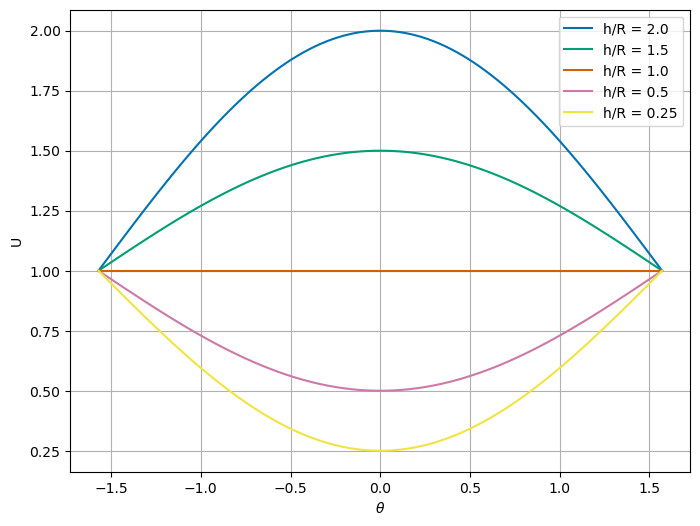

In [2]:
def ToyPotential(theta, h, R):
    return h/R*np.cos(theta)+1-np.cos(theta)

theta = np.linspace(-np.pi/2, np.pi/2, 100)

params = pd.DataFrame({'h': [2,1.5,1,0.5,0.25],'R': [1,1,1,1,1]})

plt.figure(figsize=(8, 6))
for i in range(len(params)):
    U = ToyPotential(theta, params['h'][i], params['R'][i])
    plt.plot(theta, U, label='h/R = '+str(params['h'][i]/params['R'][i]))
    
plt.xlabel(r'$\theta$')
plt.ylabel('U')
plt.legend()
plt.grid(True)


* 2c (5pt) For which values of $R$ and $h$ is the toy in stable equilibrium so that it does not fall over? Does it fit with your graphical analysis? Why does this make sense to you? Or how would you explain it to a friend?

```{admonition} Solution
:class: tip

From our graphical analysis, it appears that the toy has a stable equilibrium when $h/R < 1$. This means the location of the center of mass is inside the hemispherical bottom. That makes sense because the toy is then bottom heavy and will naturally return to the upright position. 

We can also show this mathematically by finding the second derivative of the potential energy with respect to $\theta$ and showing that it is positive for $h/R < 1$.

Starting with the potential energy,

$$V(\theta) = \dfrac{h}{R}\cos\theta + 1 - \cos\theta.$$

The first derivative is,

$$\dfrac{dV}{d\theta} = -\dfrac{h}{R}\sin\theta + \sin\theta = 0.$$

When set to zero, we find the extrema at $\theta = 0$. The second derivative is,

$$\dfrac{d^2V}{d\theta^2} = -\dfrac{h}{R}\cos\theta + \cos\theta.$$

We then evaluate that derivative at $\theta = 0$,

$$\dfrac{d^2V}{d\theta^2}|_{\theta=0} = 1 - \dfrac{h}{R}.$$

This expression is positive when $h/R < 1$, which means the toy is in stable equilibrium. This fits with the graphical analysis and our argument about the toy becoming "bottom heavy" when the center of mass is inside the hemispherical bottom.

```

### Exercise 3 (15pt), "Generic" 1D motion

We will eventually learn how to solve for equations of motion for generalized coordinates. That work requires us to think about the forces and constraints on a system. Here we will consider a particle moving along a curved path to begin to think about how to describe the motion of a particle in a more general way.

![curved-path](../images/assignments/5.3-curved_path.png)

A bead follows the curved path above, you can imagine it is a wire or a track, and the bead is constrained to move along the path. The bead's position is described by its distance along the path, $s$ as measured from the origin $O$. The $\hat{s}$ direction is always along the path - that is, it's always tangent to the wire.

* 3a (3pt) Let's start by writing the velocity $\mathbf{v}$ in terms of its Cartesian components (e.g., $dx/dt$) and find it's magnitude ($v$). How does this approach seem given the shape of the wire? Do you think we have chosen a good set of coordinates?

```{admonition} Solution
:class: tip

We start by writing the velocity in terms of its components,

$$\mathbf{v} = \langle \dfrac{dx}{dt}, \dfrac{dy}{dt}\rangle.$$

The speed of the bead is then given by,

$$v = \sqrt{\left(\dfrac{dx}{dt}\right)^2 + \left(\dfrac{dy}{dt}\right)^2}.$$

This is definitely a standard approach, but not the best. The complication of finding the $x-y$ components at every location seems a bit insurmountable. It is very challenging.
```


* 3b (4pt) Instead, consider the coordinate system $\langle \hat{s}, \hat{s}_{\perp}\rangle$. That is the the direction along the path and the direction perpendicular to it (assume we are solving this in a plane for the moment). Use this coordinate system to show that bead's speed is given by $v=\dot{s}$, that is there is no dependence of the speed on the $\hat{s}_{\perp}$ component of $\vec{v}$. How might this be a better choice?

```{admonition} Solution
:class: tip

This velocity is always tangent to the path. If we consider a generic vector along the path, $\mathbf{s} = s(t)\hat{s}$, then the velocity is given by,

$$\mathbf{v} = \dfrac{d\mathbf{s}}{dt} = \dfrac{d}{dt}(|s(t)|\hat{s}) = \dfrac{d|s|}{dt}\hat{s} + |s|\frac{d\hat{s}}{dt} .$$

However, in the velocity is always tangent to the path, so that $\frac{d\hat{s}}{dt} = 0$. This means that the velocity is given by,

$$\mathbf{v} = \dfrac{d|s|}{dt}\hat{s} = \dot{s}\hat{s}.$$

This shows that the speed of the bead is given by $v = \dot{s}$.

This approach makes this problem one-dimensional, along the path. This is the introduction of [generalized coordinates](https://en.wikipedia.org/wiki/Generalized_coordinates), which are a core part of [Lagrangian Dynamics](https://en.wikipedia.org/wiki/Lagrangian_mechanics).
```




* 3c (4pt) Still using this coordinate system, prove that the tangential component of the net force ($F_{||}$, "parallel" to the motion) on the bead is $m\ddot{s}$. 

```{admonition} Solution
:class: tip

We can start with the definition of velocity for this generic motion,

$$\mathbf{v} = \dot{s}\hat{s}.$$

We take another time derivative to find the acceleration,

$$\mathbf{a} = \dfrac{d\mathbf{v}}{dt} = \dfrac{d}{dt}(\dot{s}\hat{s}),$$
$$\mathbf{a} = \ddot{s}\hat{s} + \dot{s}\dfrac{d\hat{s}}{dt}.$$

With $d\hat{s}/dt = 0$, we find that the acceleration is given by,

$$\mathbf{a} = \ddot{s}\hat{s}.$$

That is a parallel acceleration, so that the tangential component of the net force is given by $F_{||} = m\ddot{s}$.
```

There is a force due to the wire ($\mathbf{F}_w$) that ensures the bead stays on the path. It is not in the direction of the path (i.e., friction), only perpendicular to the wire. Assume all other forces are conservative (i.e., can be derived from a generic potential $-\nabla U$). 

* 3d (4pt) Show that the tangential component of the net force due to the wire is $-\frac{dU}{ds}$.

This 1D concept extends to multiple dimensions and can help us understand the Lagrangian method of solving for the equations of motion.

```{admonition} Projection of a gradient
:class: info

We can calculate the projection for a generic potential in a particular Cartesian direction. 

$$\nabla U(\vec{r}) \cdot \hat{x} = \langle \dfrac{dU(\vec{r})}{dx}, \dfrac{dU(\vec{r})}{dy}, \dfrac{dU(\vec{r})}{dz} \rangle \cdot \langle 1,0,0 \rangle = \dfrac{dU(\vec{r})}{dx}$$

Ultimately, the projection is the what the potential changes with respect to the projection direction.
```

```{admonition} Solution
:class: tip

If we consider Newton's second law for the bead, we have,

$$\mathbf{F} = m\mathbf{a}.$$

However, we only want the tangential component of the net force, so that we can write,

$$F_{||} = \mathbf{F}\cdot\hat{s} = (\mathbf{F}_{cons}+\mathbf{F}_{w})\cdot\hat{s}$$

where we are taking the dot product of the force and the unit vector tangent to the path. Note that the net force is the sum of the wire force (perpendicular to the path) and all the conservative forces, which can point in any direction. Because the wire force is perpendicular to the path, it does not contribute to the tangential component of the net force. Thus, we can write,

$$F_{||} = \mathbf{F}_{cons}\cdot\hat{s},$$

where $\mathbf{F}_{cons} = -\nabla U$. This means that the tangential component of the net force is given by,

$$F_{||} = -\nabla U\cdot\hat{s} = -\dfrac{dU}{ds},$$

where the last step comes from the definition of the gradient and its projection.
```

### Exercise 4 (15pt), Another 1-D conservative system; baby bifurcations

The apparatus below is a massless wheel of radius $R$ that is mounted to a frictionless axle. A small, dense piece of clay with mass $M$ is glued to edge of the wheel as shown. Another mass $m$ hangs from a massless string that is wrapped around the wheel. We can assume the string is inextensible and does not slip, and the system is in a uniform gravitational field.

![apparatus](../images/assignments/5.4-apparatus.png)

We can show that this complicated system is still one-dimensional (at least in space) and then we can see the effects of parameters like $m/M$.

* 4a (3pt) In terms of the rotation angle $\phi$ of the wheel, write down the total potential energy $U(\phi)$ of the system of both masses. Take note of any constraints that you use to write this as a 1D problem. When working this kind of problem, every object-Earth pair has gravitational potential energy and we must have the same zero of potential energy for every pair.

```{admonition} Solution
:class: tip

This is a challenging setup because the potential energy is a function of the rotation angle for both masses. Moreover, we have to have the same zero of potential energy for both masses. We can start by writing the potential energy of the hanging mass, which we assume has lower potential energy when it is physically lower. If the wheel has rotated through an angle $\phi$, then the hanging mass has moved a distance $R\phi$ and has a potential energy,

$$U_{m} = -mgR\phi.$$ 

This defines the zero of potential energy to be the center of the wheel. The clay mass should also have negative potential energy when it is physically lower and positive potential energy when it is physically higher. We can see the extrema easily. If we choose the zero to be when the clay mass is at the bottom ($\phi = 0$), we should have a potential energy of $-mgR$. At the top when $\phi = \pi$, the potential energy should be $mgR$. This makes the potential energy of class mass zero at $\phi = \pi/2$ when it is in the middle. Thus both have the same potential energy zero. The potential energy of the clay mass is then,

$$U_M = -MgR\cos\phi.$$

Thus the total potential energy is,

$$U(\phi) = -mgR\phi - MgR\cos\phi.$$
```




* 4b (2pt) Use this potential energy to find  values of $m$ and $M$ for which there are "fixed points", "critical points", or what we sometimes call "equilibrium points". The language we use comes from different fields, but the concept is the same. What is the condition for the existence of any critical points?

```{admonition} Solution
:class: tip

We simplify by dividing by $MgR$ to get a dimensionless potential energy,

$$\dfrac{U(\phi)}{MgR} = V(\phi) = -\dfrac{m}{M}\phi - \cos\phi.$$

The fixed points are given where the derivative of the potential energy is zero. We can find the derivative of the potential energy,

$$\dfrac{dV}{d\phi} = -\dfrac{m}{M} + \sin\phi = 0.$$

And thus, the fixed points are given by,

$$\sin\phi = \dfrac{m}{M}.$$

Note that we seem to need $m/M < 1$ for this to make sense. This is a condition for the fixed points to exist.
```


* 4c (3pt) Describe the fixed points, determine their stability, and explain why they make sense in terms of the expected motion.

```{admonition} Solution
:class: tip

We seem to only obtain fixed points when $m/M < 1$. This means that the fixed points are given by,

$$\phi^* = \arcsin\left(\dfrac{m}{M}\right).$$

If we take the second derivative of the potential energy, we can determine the stability of the fixed points. The second derivative is,

$$\dfrac{d^2V}{d\phi^2} = \cos\phi.$$

So that the value of the second derivative at the fixed points is,

$$\dfrac{d^2V}{d\phi^2}|_{\phi^*} = \cos\left(\arcsin\left(\dfrac{m}{M}\right)\right),$$
$$\dfrac{d^2V}{d\phi^2}|_{\phi^*} = \sqrt{1 - \sin\left(\arcsin\left(\dfrac{m}{M}\right)\right)^2},$$
$$\dfrac{d^2V}{d\phi^2}|_{\phi^*} = \sqrt{1 - \dfrac{m^2}{M^2}}.$$

Note that if $m/M < 0$, then the fixed points are stable, else they appear more complicated (e.g., what happens when this second derivative gives a complex value?). For the stable points it makes some sense because the smaller mass on the strong means the wheel will not experience a large torque to turn over the mass. For the other motion, it must be that the rope mass can pull the wheel so that the clay mass starts to unwind the wheel. Let's see if we can picture it.
```



* 4d (5pt) Plot the potential energy for two different values of $m/M$ and explain the differences in the potential energy graphs. Consider cases when you observe very different motion. Think about an initial condition where the mass $m$ is at rest and the wheel is at rest. What happens when you release the mass $m$ for your two cases?

```{admonition} Solution
:class: tip

It appears that there's something important about $m/M$. So let's plot the potential energy for two different values of $m/M$. With $V(\phi) = -\dfrac{m}{M}\phi - \cos\phi$, we can choose $m/M = 0.01$, $m/M = 0.1$, $m/M=0.5$, $m/M = 0.9$, and $m/M = 1.1$. Let's also grab the minimum values for the potential energy.
```

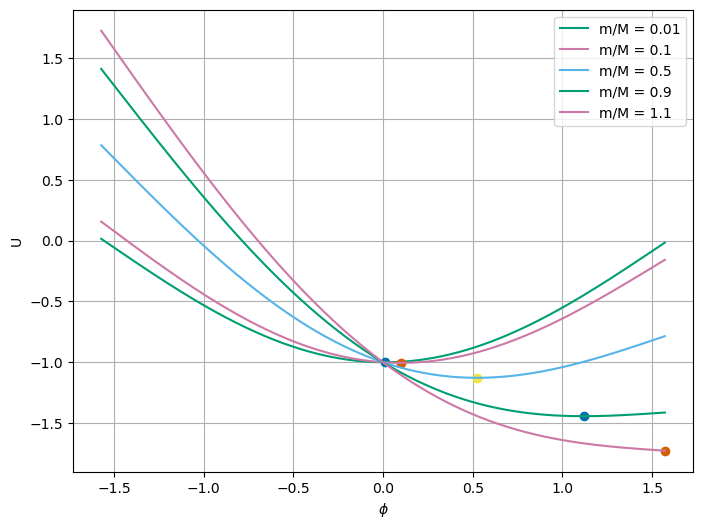

In [3]:
def WheelPotential(phi, m, M):
    return -m/M*phi-np.cos(phi)

phi = np.linspace(-np.pi/2, np.pi/2, 1000)

params = pd.DataFrame({'m': [0.01,0.1,0.5,0.9,1.1],'M': [1,1,1,1,1]})

fig = plt.figure(figsize=(8, 6))

for i in range(len(params)):
    U = WheelPotential(phi, params['m'][i], params['M'][i])
    minU = np.min(U)
    minPhi = phi[np.argmin(U)]
    plt.plot(minPhi, minU, 'o')
    plt.plot(phi, U, label='m/M = '+str(params['m'][i]/params['M'][i]))
    
plt.xlabel(r'$\phi$')
plt.ylabel('U')
plt.legend()
plt.grid(True)

```{admonition} Solution
:class: tip
It's interesting that there's something weird happening when $m/M>1$. Because it looks like the last point is the selected minimum. Let's plot the potential energy for $m/M = 1.1$ and $m/M = 0.9$ but let phi go from -$\pi/2$ to 2$\pi$. And now we see what is happening. The potential energy has local minima and local maxima. The curve for $m/M < 1$ tends to have a local minimum before $\phi=\pi/2$ at the top. So there's a chance for stable oscillations. However, if $m/M>1$, then that local minimum disappears and the potential energy has no local minima. This is a sign that the system has no stable points, but it also appears to be a sign there's no local extrema (i.e., no fixed points at all). This could have come from part 1, but now we see why. This is an example of a system the bifurcates - it goes from having stable points to having no stable points with a parameter change. This is a baby bifurcation.
```

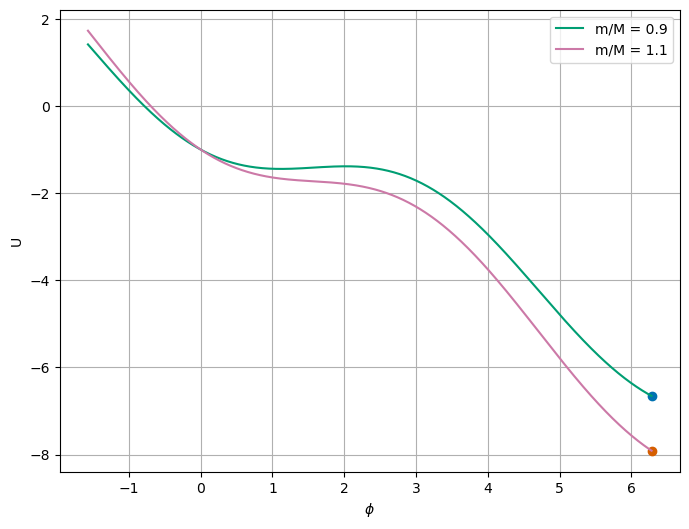

In [4]:
phi = np.linspace(-np.pi/2, 2*np.pi, 1000)

params = pd.DataFrame({'m': [0.9,1.1],'M': [1,1]})

fig = plt.figure(figsize=(8, 6))

for i in range(len(params)):
    U = WheelPotential(phi, params['m'][i], params['M'][i])
    minU = np.min(U)
    minPhi = phi[np.argmin(U)]
    plt.plot(minPhi, minU, 'o')
    plt.plot(phi, U, label='m/M = '+str(params['m'][i]/params['M'][i]))
    
plt.xlabel(r'$\phi$')
plt.ylabel('U')
plt.legend()
plt.grid(True)




* 4e (2pt) Determine the value of $m/M$ for which the system begins to exhibit oscillations (if released from $\phi=0$). 

The value of $m/M$ is a dimensionless quantity that characterizes the system. In a dynamical system, we think of it as a parameter that can change the qualitative behavior of the system. Such parameters can lead us to [bifurcations](https://en.wikipedia.org/wiki/Bifurcation_theory), [phase transitions](https://en.wikipedia.org/wiki/Phase_transition), and other interesting (often non-equilibrium) phenomena.

```{admonition} Solution
:class: tip

We need to form the condition for exhibiting oscillations. This has to happen when there's fixed points. So we need to expand the potential about those fixed points. We already found the fixed points to be,

$$\phi^* = \arcsin\left(\dfrac{m}{M}\right)$$

where we need $m/M < 1$. We can expand the potential energy about the fixed points,

$$V(\phi) \approx V(\phi^*) + \dfrac{1}{2}\dfrac{d^2V}{d\phi^2}(\phi - \phi^*)^2,$$

where we already used that the linear term will vanish as it is zero at fixed points. We found the second derivative at the fixed points to be,

$$\dfrac{d^2V}{d\phi^2}|_{\phi^*} = \sqrt{1 - \dfrac{m^2}{M^2}}.$$

Thus, the potential energy is approximately,

$$V(\phi) \approx V(\phi^*) + \dfrac{1}{2}\sqrt{1 - \dfrac{m^2}{M^2}}(\phi - \phi^*)^2.$$

This is the potential energy of a simple harmonic oscillator with an effective spring constant $k = \sqrt{1 - \dfrac{m^2}{M^2}}$. The condition for oscillations is that the $k$ is real, so that we need, 

$$1 - \dfrac{m^2}{M^2} > 0,$$
$$\dfrac{m^2}{M^2} < 1,$$
$$\dfrac{m}{M} < 1.$$

This is the same condition for the fixed points to exist. Thus, the system begins to exhibit oscillations when $m/M < 1$.
```

### Exercise 5 (20 pt), Phase Diagrams

One of the most useful tools we can learn from classical mechanics is the phase diagram. For us, it is the plot of the position and velocity of a particle in a 1D system, but the concept can be extended to higher dimensions and to other systems. The phase diagram can tell us about the stability of fixed points, the period of oscillations, and the qualitative behavior of the system. 

In this exercise, we will consider a particle in a potential $U(x)$ and we will plot the phase diagrams using both `quiver` and `streamplot` in `matplotlib`. The purpose of this exercise is to learn how to plot phase diagrams and to interpret the results.

We start with a little code for plotting the phase diagram of the simple harmonic oscillator. The code is written in a way that you can easily modify it to plot the phase diagram of other systems. The key point is to make sure that the `quiver` or `streamplot` function is called with the correct arguments. 


In [5]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.style.use('seaborn-v0_8-colorblind')

In [6]:
def SHO(X,V):
    
    # For a simple harmonic oscillator, x' = v, and v' = -x.
    dX = V
    dV = -X
    
    return dX, dV

def generate_phase_space(x_lim, v_lim, grid_size):

    x = np.linspace(x_lim[0], x_lim[1], grid_size)
    v = np.linspace(v_lim[0], v_lim[1], grid_size)
    
    X, V = np.meshgrid(x, v)
    
    dX, dV = SHO(X, V)
    
    return X, V, dX, dV

# Generate phase space
x_lim = (-5, 5)
v_lim = (-5, 5)
grid_size = 20
X, V, dX, dV = generate_phase_space(x_lim, v_lim, grid_size)

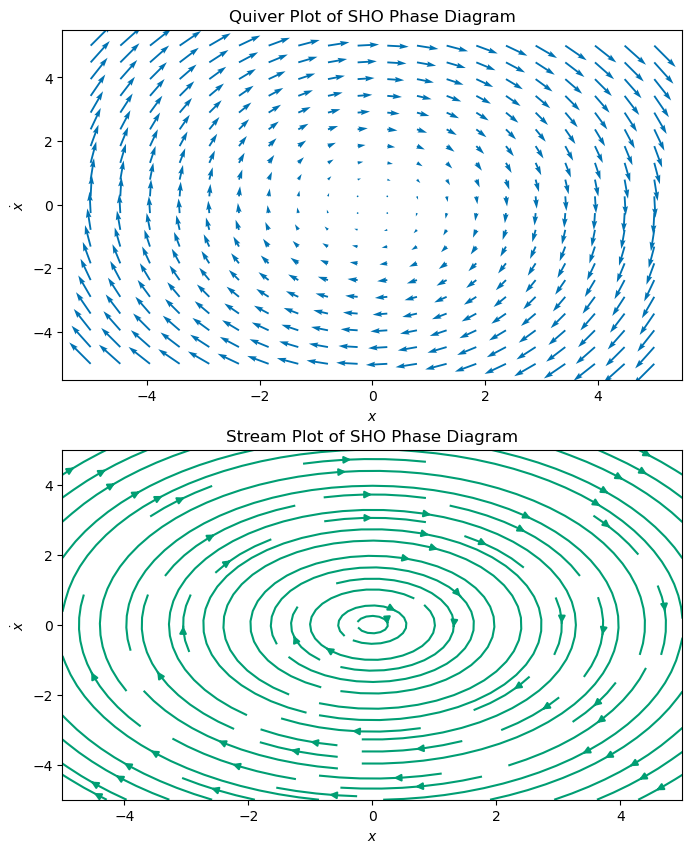

In [7]:
fig, axs = plt.subplots(2, 1, figsize=(8, 10))  # Two rows, one column
    
# Quiver plot on the first subplot
axs[0].quiver(X, V, dX, dV, color='C0')
axs[0].set_title('Quiver Plot of SHO Phase Diagram')
axs[0].set_xlabel(r'$x$')
axs[0].set_ylabel(r'$\dot{x}$')

# Stream plot on the second subplot
axs[1].streamplot(X, V, dX, dV, color='C1')
axs[1].set_title('Stream Plot of SHO Phase Diagram')
axs[1].set_xlabel(r'$x$')
axs[1].set_ylabel(r'$\dot{x}$');

* 5a (2pt) Explain how the code works to produce the phase diagram. The key part is explaining what the function `SHO` does and how that relates to the `quiver` and `streamplot` calls. What does `np.meshgrid` do and why is it used?

```{admonition} Solution
:class: tip

The code takes the location in space and computes at every location the vector that indicates the direction of the flow in the phase space. It does this by computing the components in the `SHO` function. What is also needed is a `np.meshgrid()`, which takes the arrays of the x and y axes and makes them into a grid of points. This is needed for the `quiver` and `streamplot` functions to work. The `quiver` function takes the grid of points and the components of the vectors at those points and plots the vectors. The `streamplot` function does the same thing, but it also draws the path of a particle in the phase space. 
```



We have discussed the physical pendulum in class where the potential energy is given by:

$$U(\theta)=mgl(1-\cos\theta)$$

* 5b (4pt) Modify the code to produce the phase diagram for the physical pendulum. You can choose mass and length. Make sure to explore the diagram outside of the small angle approximation. What new features do you observe in the phase diagram? What motion are they associated with?

```{admonition} Solution
:class: tip

This potential gives rise to a force:

$$F(\theta) = -\dfrac{dU}{d\theta} = -mgl\sin\theta.$$

The equation of motion is then,

$$mgl\ddot{\theta} = -mgl\sin\theta.$$

Or more simply,

$$\ddot{\theta} = -\dfrac{g}{l}\sin\theta.$$

We split this into two first order equations,

$$\dot{\theta} = \omega,$$
$$\dot{\omega} = -\dfrac{g}{l}\sin\theta.$$

and then we can plot the phase diagram. We can choose $l=1$ and $m=1$ and $g=9.8$.
```

In [8]:
def PlanePendulum(theta,omega,g,l):

    dtheta = omega
    domega = -g/l*np.sin(theta)
    
    return dtheta, domega

def generate_phase_space(x_lim, v_lim, grid_size):

    x = np.linspace(x_lim[0], x_lim[1], grid_size)
    v = np.linspace(v_lim[0], v_lim[1], grid_size)
    
    X, V = np.meshgrid(x, v)
    g = 9.8
    l = 1
    dX, dV = PlanePendulum(X, V, g, l)
    
    return X, V, dX, dV

# Generate phase space
x_lim = (-5, 5)
v_lim = (-10, 10)
grid_size = 40
X, V, dX, dV = generate_phase_space(x_lim, v_lim, grid_size)

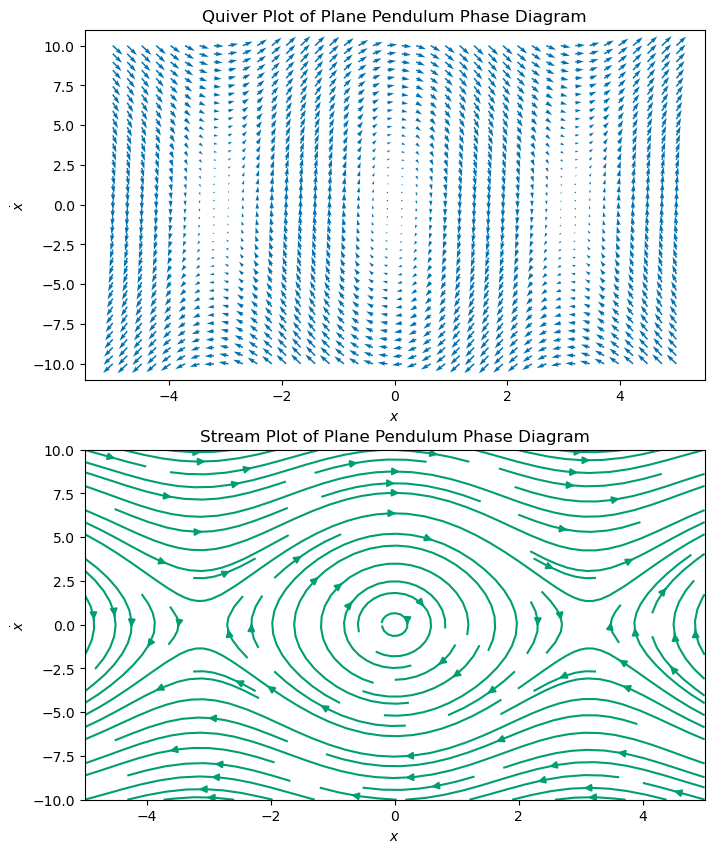

In [9]:
fig, axs = plt.subplots(2, 1, figsize=(8, 10))  # Two rows, one column
    
# Quiver plot on the first subplot
axs[0].quiver(X, V, dX, dV, color='C0')
axs[0].set_title('Quiver Plot of Plane Pendulum Phase Diagram')
axs[0].set_xlabel(r'$x$')
axs[0].set_ylabel(r'$\dot{x}$')

# Stream plot on the second subplot
axs[1].streamplot(X, V, dX, dV, color='C1')
axs[1].set_title('Stream Plot of Plane Pendulum Phase Diagram')
axs[1].set_xlabel(r'$x$')
axs[1].set_ylabel(r'$\dot{x}$');

```{admonition} Solution
:class: tip

From the phase diagrams, we can see orbits that are not quite elliptical. These are oscillations, just not simple harmonic. There's also motion at higher energies where the pendulum can rotate around the pivot point. This is a new feature that is not present in the simple harmonic oscillator.
```



Now we have a code that we can use to plot the phase diagram of any 1D system. We will use it to explore the damped harmonic oscillator and the damped physical pendulum. Here we write the equations of motion as the system is still 1-D, but the forces are not derived from a potential.

The damped harmonic oscillator has the equation of motion:
$$\ddot{x}=-\frac{k}{m}x-\frac{b}{m}\dot{x}$$

* 5c (5pt) Modify the code to produce the phase diagram for the damped harmonic oscillator. You can choose $k/m$ and $b/m$, but might want to explore the values. What features do you observe in the phase diagram? What motion are they associated with?

```{admonition} Solution
:class: tip

The damped harmonic oscillator can be written like:

$$\ddot{x}+2\beta\dot{x}+\omega_0^2x=0,$$

where $\beta = b/2m$ and $\omega_0^2 = k/m$. We know that the solution depends on how $\beta$ and $\omega_0$ compare.  So we will show solutions for $\beta/\omega_0 = 0.1$ (light damping), $\beta/\omega_0 = 1$ (critical damping), and $\beta/\omega_0 = 10$ (heavy damping).

In terms of first order equations, we have:

$$\dot{x} = v,$$
$$\dot{v} = -2\beta v - \omega_0^2x.$$
```

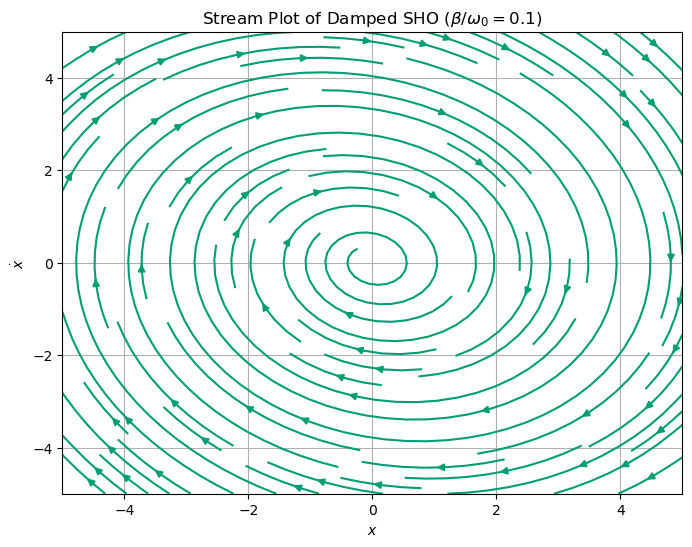

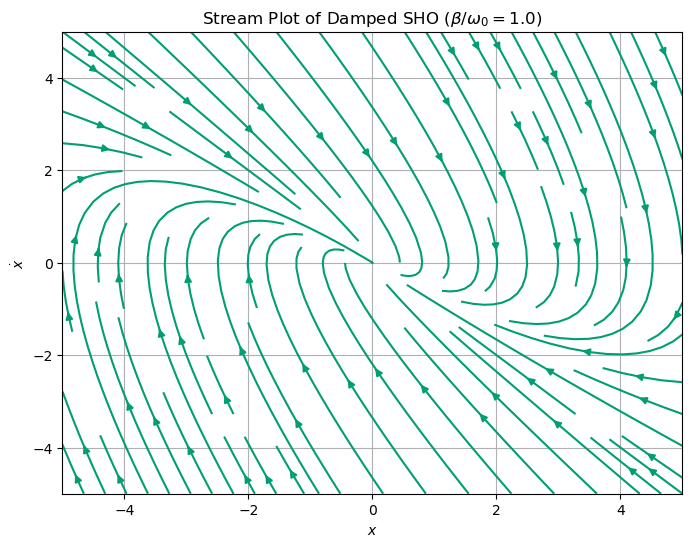

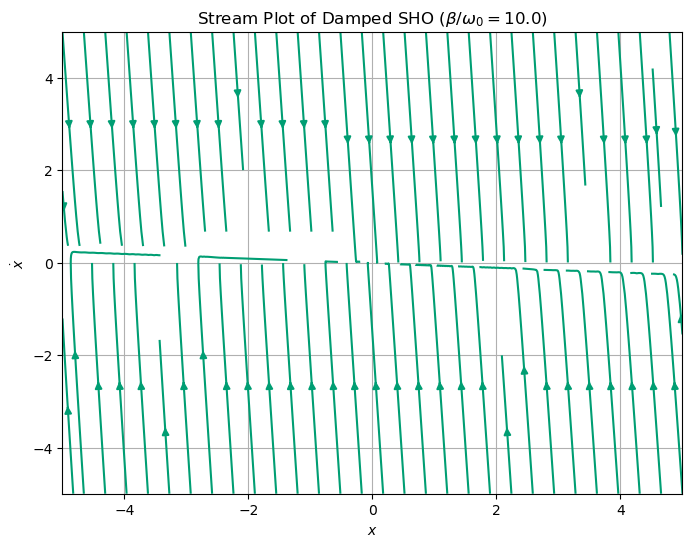

In [10]:
def DampedSHO(x,v,beta,omega0):

    dx = v
    dv = -2*beta*v-omega0**2*x
    return dx, dv

def generate_phase_space(x_lim, v_lim, grid_size,beta=0.1,omega0=1):

    x = np.linspace(x_lim[0], x_lim[1], grid_size)
    v = np.linspace(v_lim[0], v_lim[1], grid_size)
    
    X, V = np.meshgrid(x, v)
    
    dX, dV = DampedSHO(X, V, beta, omega0)
    
    return X, V, dX, dV

# Generate phase space
x_lim = (-5, 5)
v_lim = (-5, 5)
grid_size = 40

params = pd.DataFrame({'beta': [0.1,1,10],'omega0': [1,1,1]})

for i in range(len(params)):
    X, V, dX, dV = generate_phase_space(x_lim, v_lim, grid_size,params['beta'][i],params['omega0'][i])

    fig = plt.figure(figsize=(8, 6))

    # Stream plot on the second subplot
    plt.streamplot(X, V, dX, dV, color='C1')
    plt.title(r'Stream Plot of Damped SHO ($\beta/\omega_0 = $'+str(params['beta'][i]/params['omega0'][i])+')')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$\dot{x}$')
    plt.grid(True);



The damped physical pendulum has the equation of motion:
$$\ddot{\theta}=-\frac{g}{l}\sin\theta-\frac{b}{ml}\dot{\theta}$$

* 5d (5pt) Modify the code again to produce the phase diagram for the damped physical pendulum. You can choose $b/ml$, but might want to explore the values. How does this motion compare to the motion of the damped harmonic oscillator? 

```{admonition} Solution
:class: tip

To make life easier, we will choose $\omega_0^2 = g/l$ and $\beta = \dfrac{b}{ml}$. This gives us the equation of motion,

$$\ddot{\theta} = -\omega_0^2\sin\theta - \beta\dot{\theta}.$$

And we write that as two first order equations,

$$\dot{\theta} = \omega,$$
$$\dot{\omega} = -\omega_0^2\sin\theta - \beta\omega.$$

Clearly there's some importance to the ratio of damping to the natural frequency. So we will choose a few combinations. We observe the motion is damped but we also see over the top motion that is not present in the damped harmonic oscillator.
```



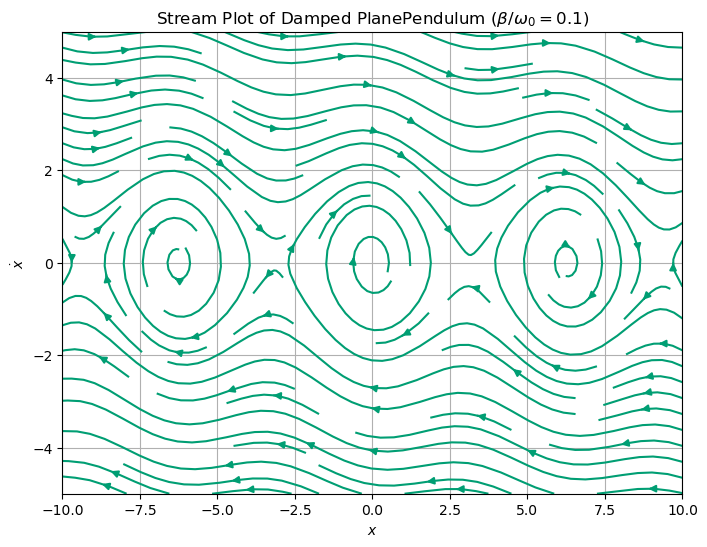

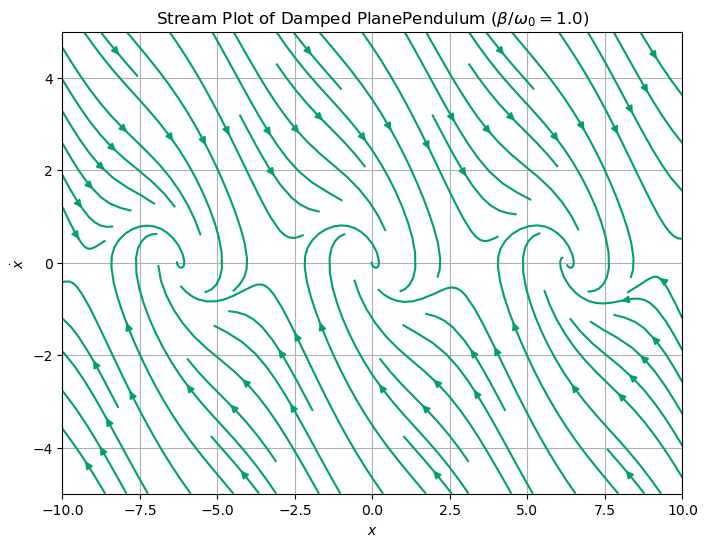

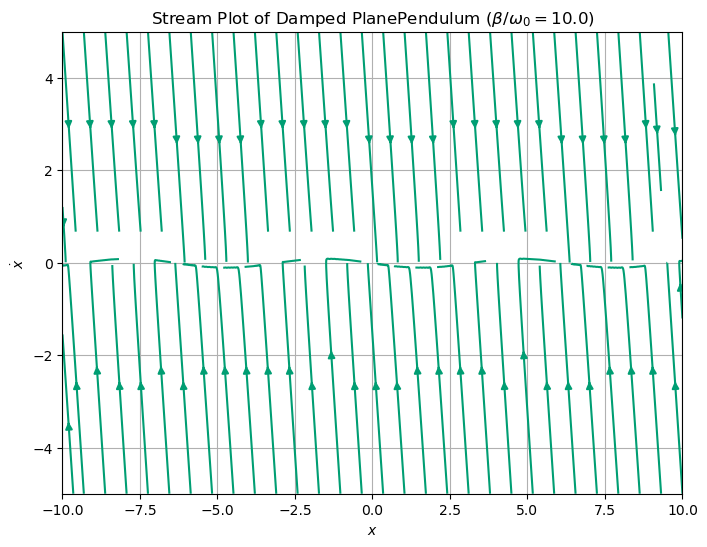

In [11]:
def PlanePendulumDrag(theta,omega,beta,omega0):

    dtheta = omega
    domega = -omega0**2*np.sin(theta)-beta*omega
    
    return dtheta, domega

def generate_phase_space(x_lim, v_lim, grid_size,beta=0.1,omega0=1):

    x = np.linspace(x_lim[0], x_lim[1], grid_size)
    v = np.linspace(v_lim[0], v_lim[1], grid_size)
    
    X, V = np.meshgrid(x, v)
    dX, dV = PlanePendulumDrag(X, V, beta, omega0)
    
    return X, V, dX, dV

# Generate phase space
x_lim = (-10, 10)
v_lim = (-5, 5)
grid_size = 40

params = pd.DataFrame({'beta': [0.1,1,10],'omega0': [1,1,1]})

for i in range(len(params)):
    X, V, dX, dV = generate_phase_space(x_lim, v_lim, grid_size,params['beta'][i],params['omega0'][i])

    fig = plt.figure(figsize=(8, 6))

    # Stream plot on the second subplot
    plt.streamplot(X, V, dX, dV, color='C1')
    plt.title(r'Stream Plot of Damped PlanePendulum ($\beta/\omega_0 = $'+str(params['beta'][i]/params['omega0'][i])+')')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$\dot{x}$')
    plt.grid(True);



* 5e (4pt) Return to the simple harmonic oscillator. Show using conservation of energy the phase diagram is a series of ellipses in $(x,v)$ space. Plot these ellipses on top of a phase diagram for the simple harmonic oscillator to illustrate how the phase diagram explains the total energy of the system.

```{admonition} Solution
:class: tip

We can start with the conservation of energy equation,

$$E = \dfrac{1}{2}m\dot{x}^2 + \dfrac{1}{2}kx^2.$$

We can divide by $E$ to get a dimensionless equation,

$$\dfrac{1}{2E}m\dot{x}^2 + \dfrac{1}{2E}kx^2 = 1.$$

Let's clean this up a bit:

$$\dfrac{x^2}{x_0^2} + \dfrac{\dot{x}^2}{v_0^2} = 1,$$

where $x_0 = \sqrt{\dfrac{2E}{k}}$ and $v_0 = \sqrt{\dfrac{2E}{m}}$. This is the equation of an ellipse. We can plot this on top of the phase diagram for the simple harmonic oscillator.
```

/var/folders/6q/fl2y7xb92570fzrj3q_0pj1w0000gn/T/ipykernel_49854/2996982062.py:33: RuntimeWarning: invalid value encountered in sqrt
  v1 = np.sqrt(2*energies['E'][i]-x**2)
/var/folders/6q/fl2y7xb92570fzrj3q_0pj1w0000gn/T/ipykernel_49854/2996982062.py:34: RuntimeWarning: invalid value encountered in sqrt
  v2 = -np.sqrt(2*energies['E'][i]-x**2)


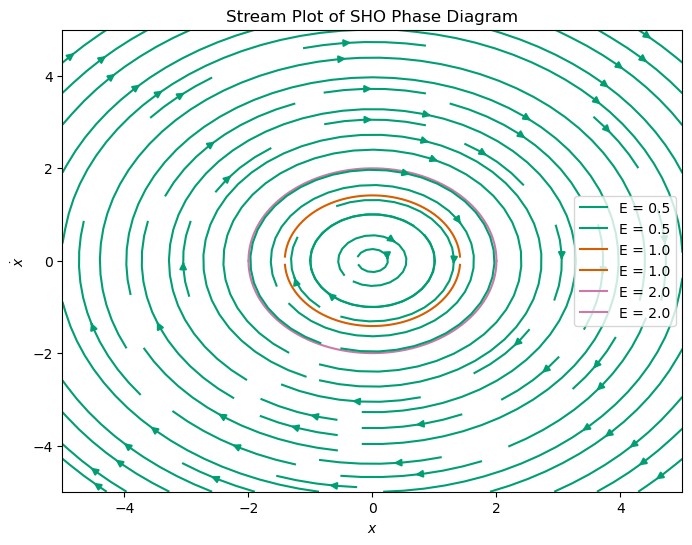

In [12]:
def SHO(X,V,k,m):
    
    # For a simple harmonic oscillator, x' = v, and v' = -x.
    dX = V
    dV = -k/m*X
    
    return dX, dV

def generate_phase_space(x_lim, v_lim, grid_size):

    x = np.linspace(x_lim[0], x_lim[1], grid_size)
    v = np.linspace(v_lim[0], v_lim[1], grid_size)
    
    X, V = np.meshgrid(x, v)
    
    k=1
    m=1
    dX, dV = SHO(X, V, k, m)
    
    return X, V, dX, dV

# Generate phase space
x_lim = (-5, 5)
v_lim = (-5, 5)

energies = pd.DataFrame({'E': [0.5,1,2]})

fig = plt.figure(figsize=(8, 6))

for i in range(len(energies)):
    
    x = np.linspace(-np.sqrt(2*energies['E'][i]), np.sqrt(2*energies['E'][i]), 1000)
    v1 = np.sqrt(2*energies['E'][i]-x**2)
    v2 = -np.sqrt(2*energies['E'][i]-x**2)
    plt.plot(x,v1, color='C'+str(i+1), label='E = '+str(energies['E'][i]))
    plt.plot(x,v2, color='C'+str(i+1), label='E = '+str(energies['E'][i]))

plt.legend()
grid_size = 20
X, V, dX, dV = generate_phase_space(x_lim, v_lim, grid_size)
    
plt.streamplot(X, V, dX, dV, color='C1')
plt.title('Stream Plot of SHO Phase Diagram')
plt.xlabel(r'$x$')
plt.ylabel(r'$\dot{x}$');



### Exercise 6 (30pt), Numerical integration techniques and oscillations

We've discussed the Euler method and made use of it in the prior homeworks. However, the Euler method is not the most accurate method for solving ODEs. It has a real issue with energy conservation, which is a problem for conservative systems. Here we will explore the Euler-Cromer method and the Runge-Kutta methods for the simple harmonic oscillator. You will then apply these same methods to the various oscillators in Exercise 5.

Below we have written a code to solve the ODE:

$$\ddot{x}=-\omega^2 x$$

where the initial position is 1 and the initial velocity is 0. The time step is set by the number of integration steps, $N$. We wrote a function called `euler` that will then solve the ODE using the Euler method. There's a second function called `euler_cromer` that uses the Euler-Cromer method.

In [13]:
omega = 1  # Angular frequency
x0 = 1  # Initial position
v0 = 0  # Initial velocity
t0 = 0  # Start time
tf = 100  # End time
N = 10000  # Number of time steps
dt = (tf-t0)/N  # Time step


In [14]:
def euler(omega, x0, v0, t0, tf, dt):
    t = np.arange(t0, tf, dt)
    x = np.zeros(t.shape)
    v = np.zeros(t.shape)
    x[0], v[0] = x0, v0

    for i in range(1, len(t)):
        x[i] = x[i-1] + dt * v[i-1]
        v[i] = v[i-1] - dt * omega**2 * x[i-1]

    return t, x, v

def euler_cromer(omega, x0, v0, t0, tf, dt):
    t = np.arange(t0, tf, dt)
    x = np.zeros(t.shape)
    v = np.zeros(t.shape)
    x[0], v[0] = x0, v0

    for i in range(1, len(t)):
        v[i] = v[i-1] - dt * omega**2 * x[i-1]
        x[i] = x[i-1] + dt * v[i]

    return t, x, v


We now call the `euler` and `euler_cromer` functions and plot the position and velocity as a function of time. We do this by storing the position and velocity as `pandas` dataframes. This kind of data structure is useful for storing time series data and is easy to plot. It's a good idea to get in the habit of working with data structures like this.


In the resulting plots you can see how the Euler-Cromer method is more accurate than the Euler method. The Euler method has a systematic error that causes the amplitude of the oscillation to grow. The Euler-Cromer method does not have this problem.

In [15]:
t, x, v = euler(omega, x0, v0, t0, tf, dt)
eulerdf = pd.DataFrame({'t': t, 'x': x, 'v': v})

t, x, v = euler_cromer(omega, x0, v0, t0, tf, dt)
euler_cromerdf = pd.DataFrame({'t': t, 'x': x, 'v': v})

eulerdf.head()

t       x         v
0  0.00  1.0000  0.000000
1  0.01  1.0000 -0.010000
2  0.02  0.9999 -0.020000
3  0.03  0.9997 -0.029999
4  0.04  0.9994 -0.039996

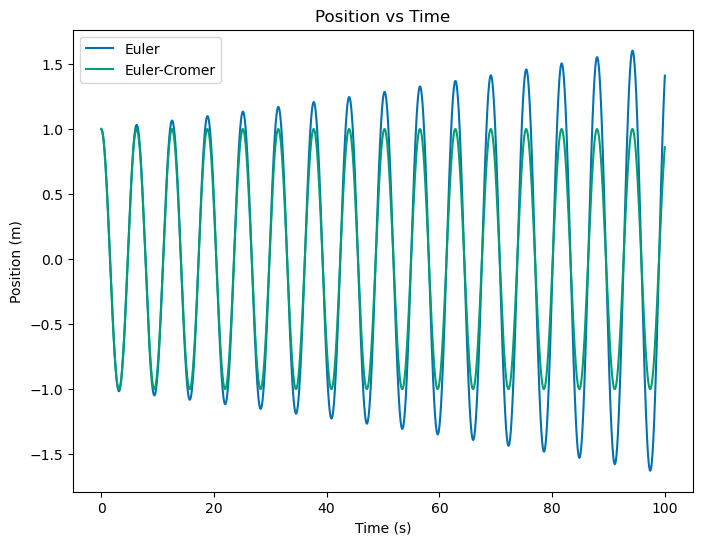

In [16]:
# plot all positions vs time on the same graph
plt.figure(figsize=(8, 6))
plt.plot(eulerdf['t'], eulerdf['x'], label='Euler')
plt.plot(euler_cromerdf['t'], euler_cromerdf['x'], label='Euler-Cromer')
plt.title('Position vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend();

* 6a (2pt) Graph the energy of the system as a function of time for both the Simple Euler and Euler-Cromer methods. You should use the same initial conditions and time step for both methods. What do you observe?

```{admonition} Solution
:class: tip
We can compute the energy directly from the position and velocity. The energy is given by,

$$U(t) = \dfrac{1}{2}kx(t)^2,$$
$$K(t) = \dfrac{1}{2}m\dot{x}(t)^2,$$
$$E(t) = U(t) + K(t).$$

We choose $m=1$, so that the equations simplify to,

$$\omega^2 = k/m = k,$$
$$U(t) = \dfrac{1}{2}\omega^2x(t)^2,$$
$$K(t) = \dfrac{1}{2}\dot{x}(t)^2,$$
$$E(t) = U(t) + K(t).$$

When we plot them both, we can see that the Euler step produces a systematic error that casues the energy to grow. The Euler-Cromer method does not have this problem.
```


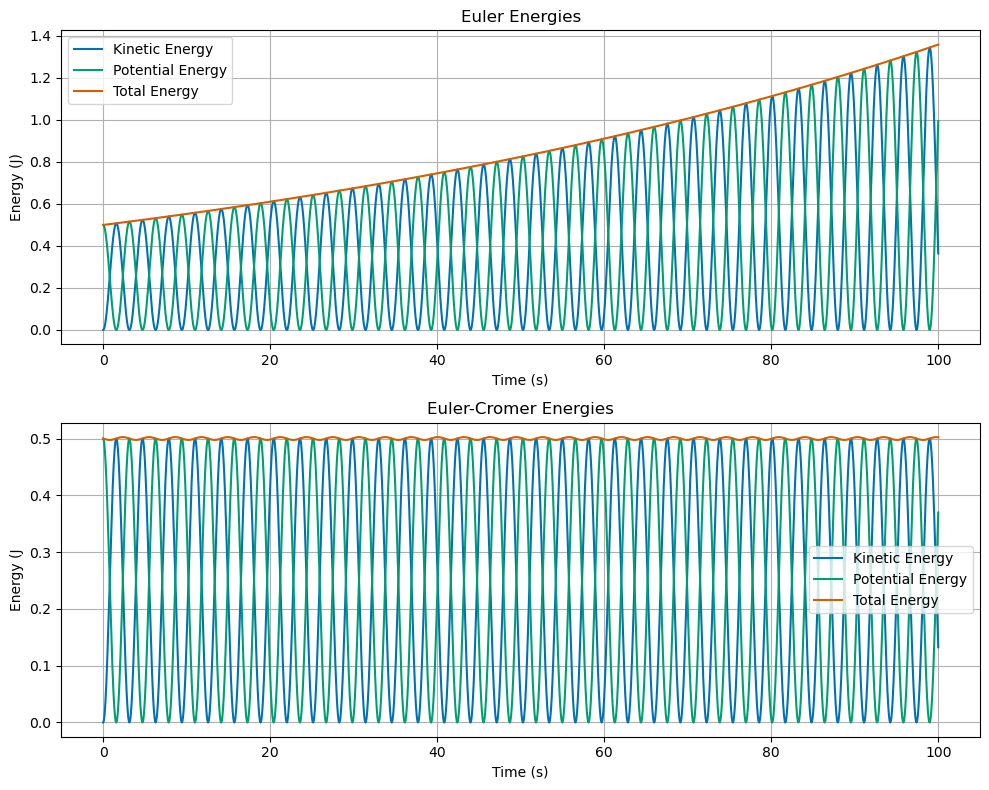

In [17]:
def ComputeEnergies(x, v, omega):
    kinetic = 0.5 * v**2
    potential = 0.5 * omega**2 * x**2 ## with m = 1
    return kinetic, potential, kinetic + potential

K1, U1, E1 = ComputeEnergies(eulerdf['x'], eulerdf['v'], omega)
K2, U2, E2 = ComputeEnergies(euler_cromerdf['x'], euler_cromerdf['v'], omega)


## Create subplots of the two energies
fig, axs = plt.subplots(2, 1, figsize=(10, 8))  # Two rows, one column

axs[0].plot(eulerdf['t'], K1, label='Kinetic Energy')
axs[0].plot(eulerdf['t'], U1, label='Potential Energy')
axs[0].plot(eulerdf['t'], E1, label='Total Energy')
axs[0].set_title('Euler Energies')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Energy (J)')
axs[0].legend()
axs[0].grid(True)


axs[1].plot(euler_cromerdf['t'], K2, label='Kinetic Energy')
axs[1].plot(euler_cromerdf['t'], U2, label='Potential Energy')
axs[1].plot(euler_cromerdf['t'], E2, label='Total Energy')
axs[1].set_title('Euler-Cromer Energies')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Energy (J')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()




* 6b (4pt) Write the exact solution for these initial conditions and compare the numerical solutions to the exact solution using a point-by-point measure. What do you observe? Come up with a measure of the overall error (or find one) in the numerical solution and discuss the results.

```{admonition} Solution
:class: tip

For the simple harmonic oscillator, the exact solution is,

$$x(t) = A_1\cos(\omega t) + A_2 \sin(\omega t)$$

With $x(0) = 1$ and $\dot{x}(0) = 0$, we find that $A_1 = 1$ and $A_2 = 0$. Thus the exact solution is,

$$x(t) = \cos(\omega t).$$

The velocity is then,

$$\dot{x}(t) = -\omega\sin(\omega t).$$

And the kinetic and potential energies are easily computed:

$$U(t) = \dfrac{1}{2}\omega^2\cos^2(\omega t),$$
$$K(t) = \dfrac{1}{2}\omega^2\sin^2(\omega t),$$

To perform a point by point comparison, we want to make sure that both the exact and numerical solutions are at the same time. 

```


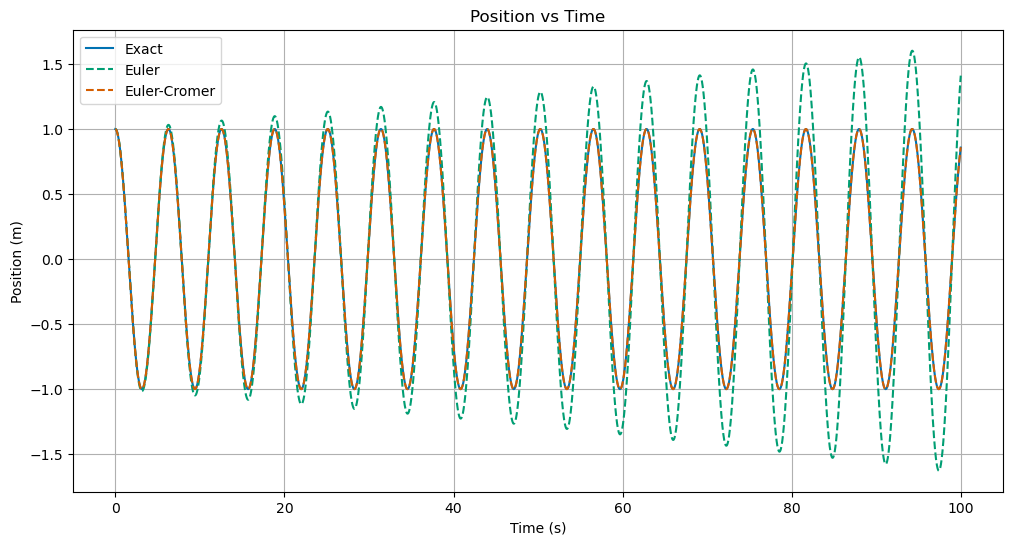

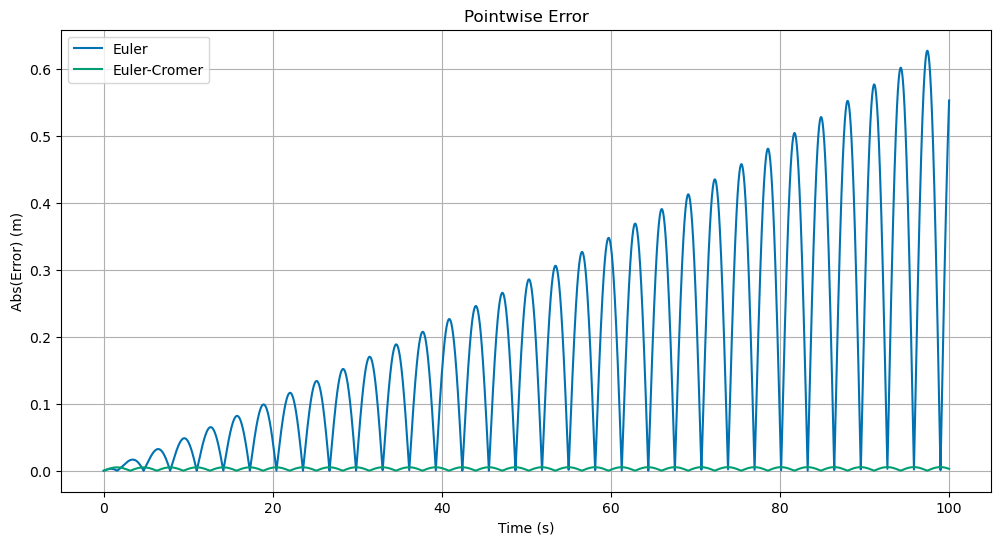

In [18]:
tExact = np.arange(t0, tf, dt)
xExact = x0*np.cos(omega*tExact)
vExact = -x0*omega*np.sin(omega*tExact)

exactdf = pd.DataFrame({'t': tExact, 'x': xExact, 'v': vExact})

# plot all positions vs time on the same graph 

plt.figure(figsize=(12, 6))
plt.plot(exactdf['t'], exactdf['x'], label='Exact')
plt.plot(eulerdf['t'], eulerdf['x'], '--', label='Euler')
plt.plot(euler_cromerdf['t'], euler_cromerdf['x'], '--', label='Euler-Cromer')
plt.title('Position vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.grid(True)
plt.legend();

## Create a plot of the pointwise error for each method

plt.figure(figsize=(12, 6))
plt.plot(eulerdf['t'], np.abs(eulerdf['x']-exactdf['x']), label='Euler')
plt.plot(euler_cromerdf['t'], np.abs(euler_cromerdf['x']-exactdf['x']), label='Euler-Cromer')
plt.title('Pointwise Error')
plt.xlabel('Time (s)')
plt.ylabel('Abs(Error) (m)')
plt.grid(True)
plt.legend();


```{admonition} Solution
:class: tip

This is quite interesting, the Euler-Cromer method produces error in every cycle, but it is a constant absolute error in every cycle. The Euler method produces a systematic error that grows with time. This is a sign that the Euler-Cromer method is more accurate than the Euler method.

However, how can it be that the Euler-Cromer method doesn't end up growing this error? Because the error is distributed as positive and negative error in each point more evenly, so that in a given cycle, the error cancels out more readily. Let's graph a few cycles to see this. We will also compute the actual error (with sign) and the cumulative error over a cycle.
```

/Users/caballero/anaconda3/envs/teaching/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


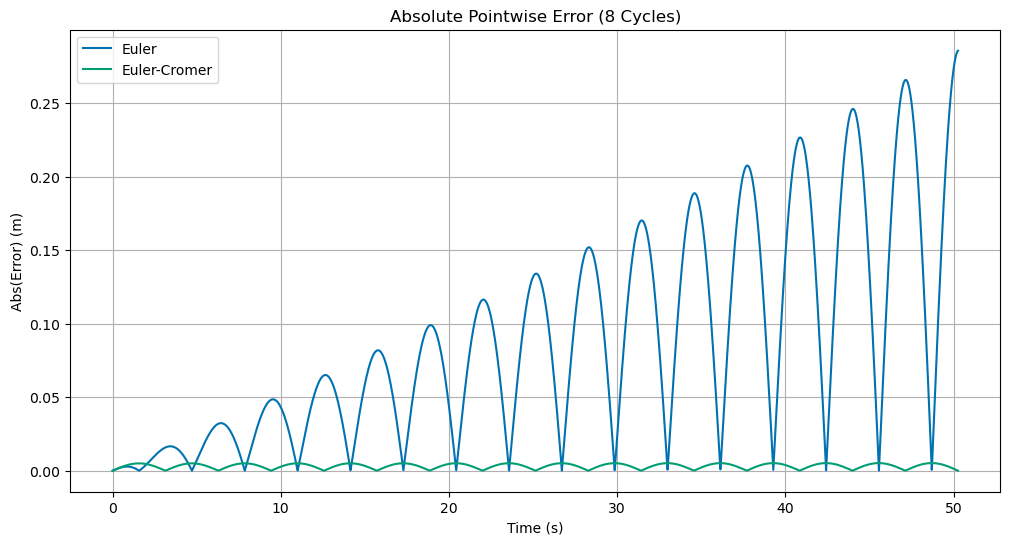

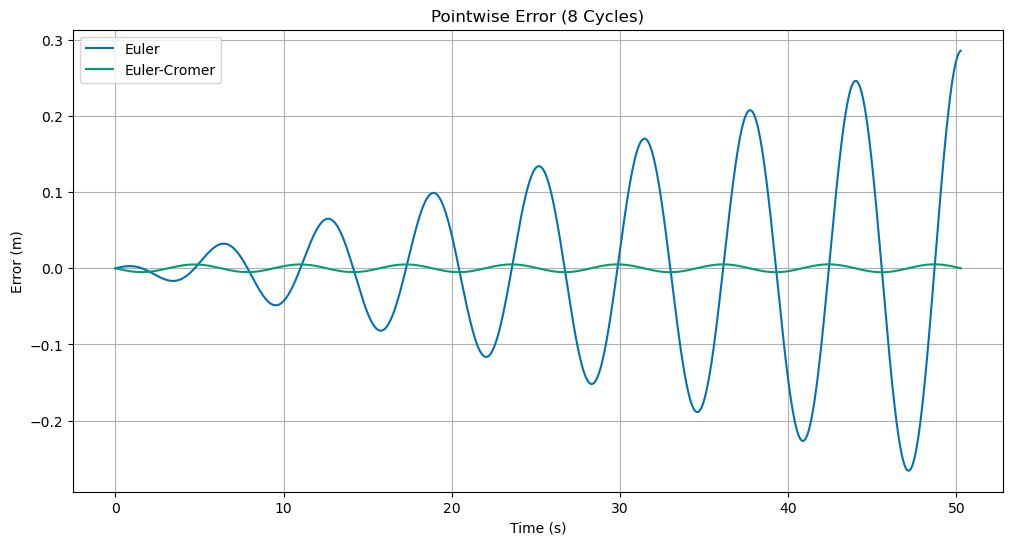

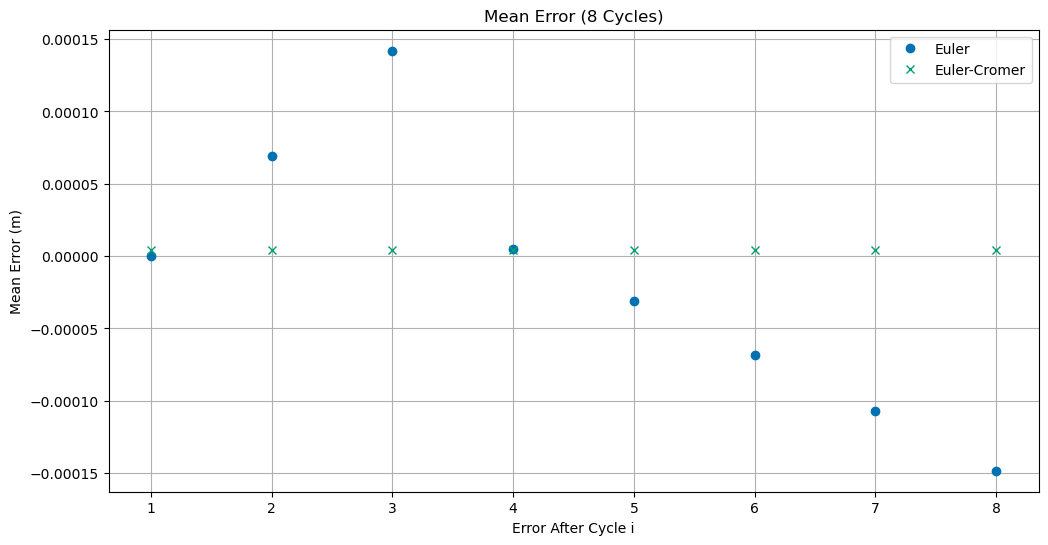

In [19]:
cycles = 8
exactCycles = exactdf[exactdf['t'] <= cycles*2*np.pi/omega]
eulerdfCycles = eulerdf[eulerdf['t'] <= cycles*2*np.pi/omega]
euler_cromerdfCycles = euler_cromerdf[euler_cromerdf['t'] <= cycles*2*np.pi/omega]

errEuler = eulerdfCycles['x']-exactCycles['x']
errEulerCromer = euler_cromerdfCycles['x']-exactCycles['x']

## Create a plot of the pointwise error for each method

plt.figure(figsize=(12, 6))
plt.plot(eulerdfCycles['t'], np.abs(errEuler), label='Euler')
plt.plot(euler_cromerdfCycles['t'], np.abs(errEulerCromer), label='Euler-Cromer')
plt.title('Absolute Pointwise Error ({} Cycles)'.format(cycles))
plt.xlabel('Time (s)')
plt.ylabel('Abs(Error) (m)')
plt.grid(True)
plt.legend();


plt.figure(figsize=(12, 6))
plt.plot(eulerdfCycles['t'], errEuler, label='Euler')
plt.plot(euler_cromerdfCycles['t'], errEulerCromer, label='Euler-Cromer')
plt.title('Pointwise Error ({} Cycles)'.format(cycles))
plt.xlabel('Time (s)')
plt.ylabel('Error (m)')
plt.grid(True)
plt.legend();

## split the error arrays into chunks based on the number of cycles
def split_errors(errors, cycles):
    return np.array_split(errors, cycles)

errEulerChunks = split_errors(errEuler, cycles)
errEulerCromerChunks = split_errors(errEulerCromer, cycles)

## Create a plot of the mean error for each method
cycleLoc = np.arange(1,cycles+1)
eulerMeans = [np.mean(chunk) for chunk in errEulerChunks]
eulerCromerMeans = [np.mean(chunk) for chunk in errEulerCromerChunks]

plt.figure(figsize=(12, 6))

plt.plot(cycleLoc, eulerMeans, 'o', label='Euler')
plt.plot(cycleLoc, eulerCromerMeans, 'x', label='Euler-Cromer')
plt.title('Mean Error ({} Cycles)'.format(cycles))
plt.xlabel('Error After Cycle i')
plt.ylabel('Mean Error (m)')
plt.grid(True)
plt.legend();


```{admonition} Solution
:class: tip
Clearly we can see the Euler-Cromer method has a constant error in each cycle. The Euler method has a systematic error that grows with time. This is a sign that we should use the Euler-Cromer method over the Euler method, especially for oscillatory systems. We can finally compute the total error over the entire time period to show that the Euler-Cromer method has a smaller error.
```

In [20]:
## Compute total error for each method
print('Total Error for Euler:', np.sum(eulerdf['x']-exactdf['x']))
print('Total Error for Euler-Cromer:', np.sum(euler_cromerdf['x']-exactdf['x']))


Total Error for Euler: -33.389594700868294
Total Error for Euler-Cromer: -0.03396030383026072



* 6c (4pt) Write the code to solve the simple harmonic oscillator with second-order Runge Kutta (this needs to be from scratch, not using a library). You can use the lecture notes as a starting point.

```{admonition} Solution
:class: tip

The Runge-Kutta method is a second order method that should be more accurate than Euler or Euler-Cromer. For the problem we are solving

$$\ddot{x} = -\omega_0^2 x$$

with a time step $dt$, the second order Runge Kutta method is given by,

$$x_{n+1} = x_n + \dfrac{1}{2}\left(k_1+k_2\right)dt,$$
$$v_{n+1} = v_n + \dfrac{1}{2}\left(l_1+l_2\right)dt,$$

where,

$$k_1 = v_n,$$
$$l_1 = -\omega_0^2 x_n,$$
$$k_2 = (v_n + l_1/2),$$
$$l_2 = -\omega_0^2(x_n + k_1/2).$$

We implement this below. And use it to solve the simple harmonic oscillator.
```

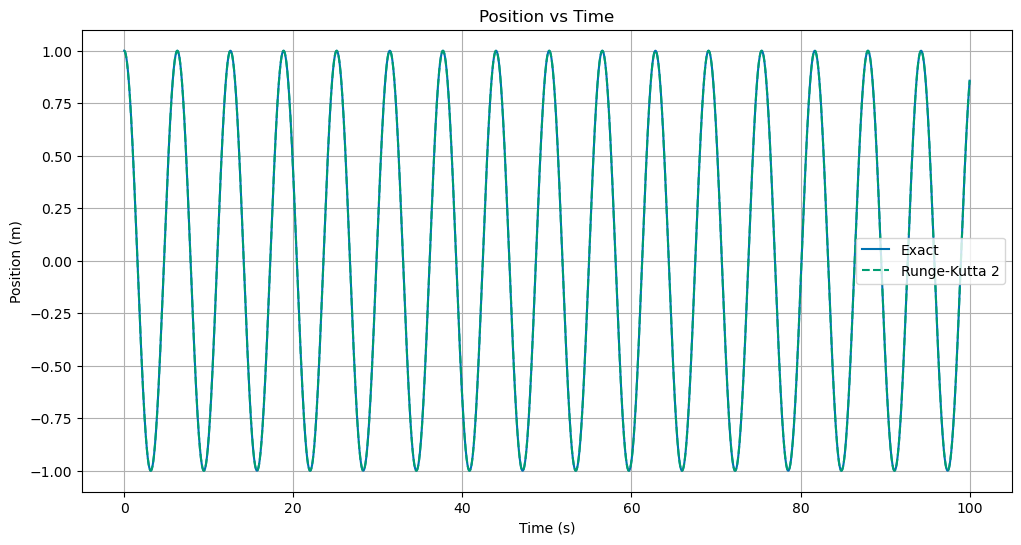

In [21]:
def runge_kutta_2(omega, x0, v0, t0, tf, dt):
    t = np.arange(t0, tf, dt)
    x = np.zeros(t.shape)
    v = np.zeros(t.shape)
    x[0], v[0] = x0, v0

    for i in range(1, len(t)):
        k1x = v[i-1]
        k1v = -omega**2 * x[i-1]
        k2x = v[i-1] + dt * k1v
        k2v = -omega**2 * (x[i-1] + dt * k1x)
        x[i] = x[i-1] + 0.5 * dt * (k1x + k2x)
        v[i] = v[i-1] + 0.5 * dt * (k1v + k2v)

    return t, x, v

## Reuse the same initial conditions and time parameters
omega = 1  # Angular frequency
x0 = 1  # Initial position
v0 = 0  # Initial velocity
t0 = 0  # Start time
tf = 100  # End time
N = 10000  # Number of time steps
dt = (tf-t0)/N  # Time step

t, x, v = runge_kutta_2(omega, x0, v0, t0, tf, dt)
rk2df = pd.DataFrame({'t': t, 'x': x, 'v': v})

plt.figure(figsize=(12, 6))
plt.plot(exactdf['t'], exactdf['x'], label='Exact')
plt.plot(rk2df['t'], rk2df['x'], '--', label='Runge-Kutta 2')
plt.title('Position vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.grid(True)
plt.legend();


* 6d (2pt) Compare the results of this RK2 method to the previous methods. Use whatever comparison method you can develop or explain. Careful here because the time steps might not be the same for the different methods.

```{admonition} Solution
:class: tip

We will use another point by point comparison. We will also compute the actual error (with sign) and the cumulative error over a cycle. We will also compute the total error over the entire time period to show that the Runge-Kutta method has a smaller error. It's quite small, but it is there. We can also see that the error is not systematic, so that it is not growing with time.
```

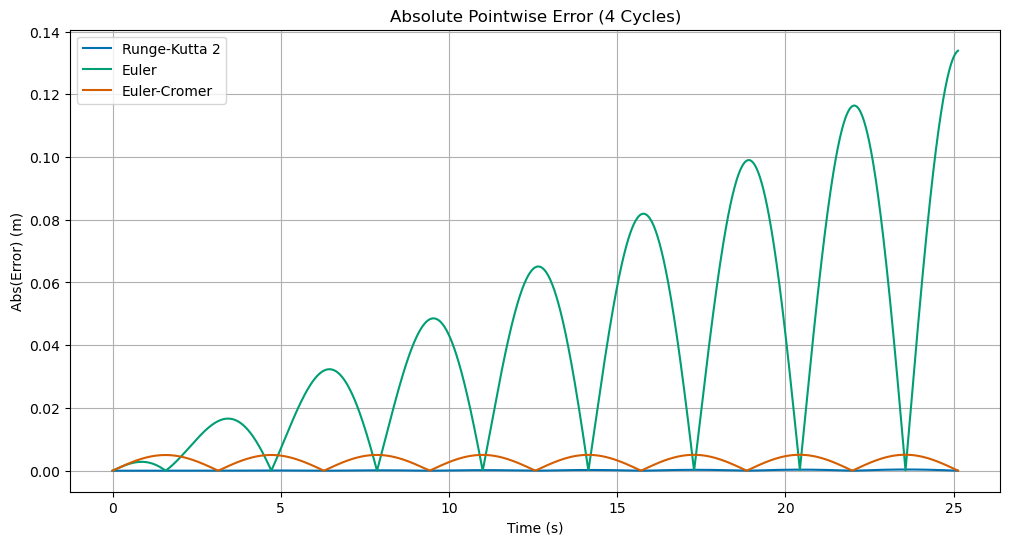

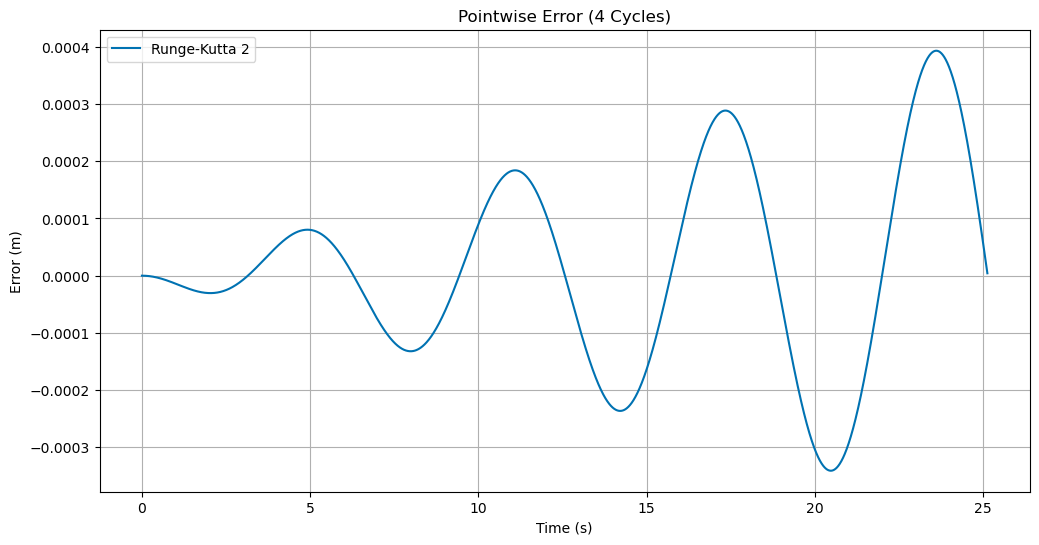

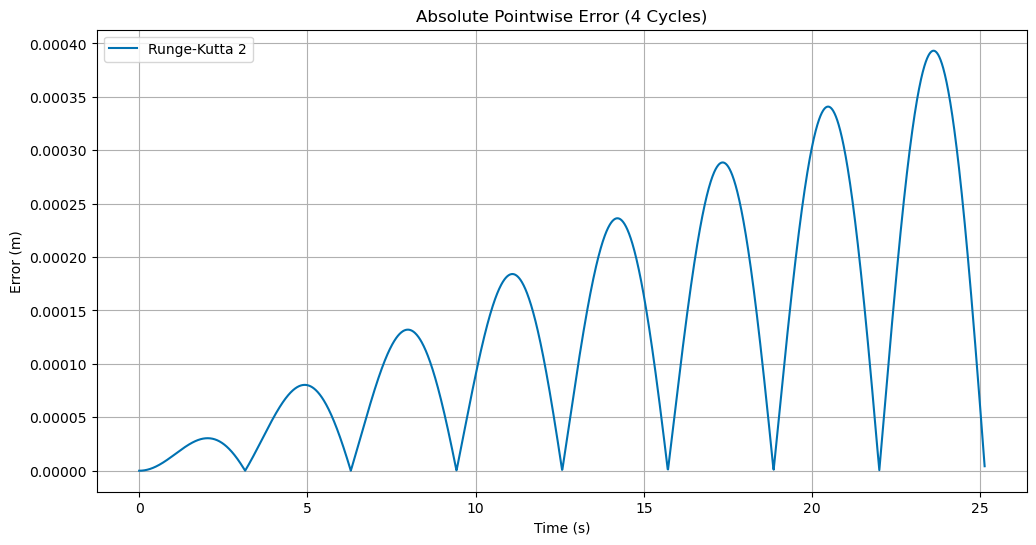

In [22]:
cycles = 4

exactCycles = exactdf[exactdf['t'] <= cycles*2*np.pi/omega]
rk2dfCycles = rk2df[rk2df['t'] <= cycles*2*np.pi/omega]
eulerdfCycles = eulerdf[eulerdf['t'] <= cycles*2*np.pi/omega]
euler_cromerdfCycles = euler_cromerdf[euler_cromerdf['t'] <= cycles*2*np.pi/omega]

errRK2 = rk2dfCycles['x']-exactCycles['x']
errEuler = eulerdfCycles['x']-exactCycles['x']
errEulerCromer = euler_cromerdfCycles['x']-exactCycles['x']


plt.figure(figsize=(12, 6))
plt.plot(rk2dfCycles['t'], np.abs(errRK2), label='Runge-Kutta 2')
plt.plot(eulerdfCycles['t'], np.abs(errEuler), label='Euler')
plt.plot(euler_cromerdfCycles['t'], np.abs(errEulerCromer), label='Euler-Cromer')
plt.title('Absolute Pointwise Error ({} Cycles)'.format(cycles))
plt.xlabel('Time (s)')
plt.ylabel('Abs(Error) (m)')
plt.grid(True)
plt.legend();

plt.figure(figsize=(12, 6))
plt.plot(rk2dfCycles['t'], errRK2, label='Runge-Kutta 2')
plt.title('Pointwise Error ({} Cycles)'.format(cycles))
plt.xlabel('Time (s)')
plt.ylabel('Error (m)')
plt.grid(True)
plt.legend();

plt.figure(figsize=(12, 6))
plt.plot(rk2dfCycles['t'], np.abs(errRK2), label='Runge-Kutta 2')
plt.title('Absolute Pointwise Error ({} Cycles)'.format(cycles))
plt.xlabel('Time (s)')
plt.ylabel('Error (m)')
plt.grid(True)
plt.legend();

In [23]:
print('Total Error for Runge-Kutta 2:', np.sum(np.abs(rk2df['x']-exactdf['x'])))
print('Total Error for Euler:', np.sum(np.abs(eulerdf['x']-exactdf['x'])))
print('Total Error for Euler-Cromer:', np.sum(np.abs(euler_cromerdf['x']-exactdf['x'])))

Total Error for Runge-Kutta 2: 5.338392482129274
Total Error for Euler: 1882.1792866638511
Total Error for Euler-Cromer: 33.264837282230076



* 6e (3pt) Look up `solve_ivp` in the `scipy` library and use it to solve the simple harmonic oscillator. Compare the results to the previous methods. What integrator are you using with `solve_ivp`? 

```{admonition} Solution
:class: tip

The library `scipy` has lots of useful tools for us and `solve_ivp` is on that can be used to numerically model ODEs. We will implement it below for the harmonic oscillator,

$$\ddot{x} = -\omega_0^2 x.$$
```

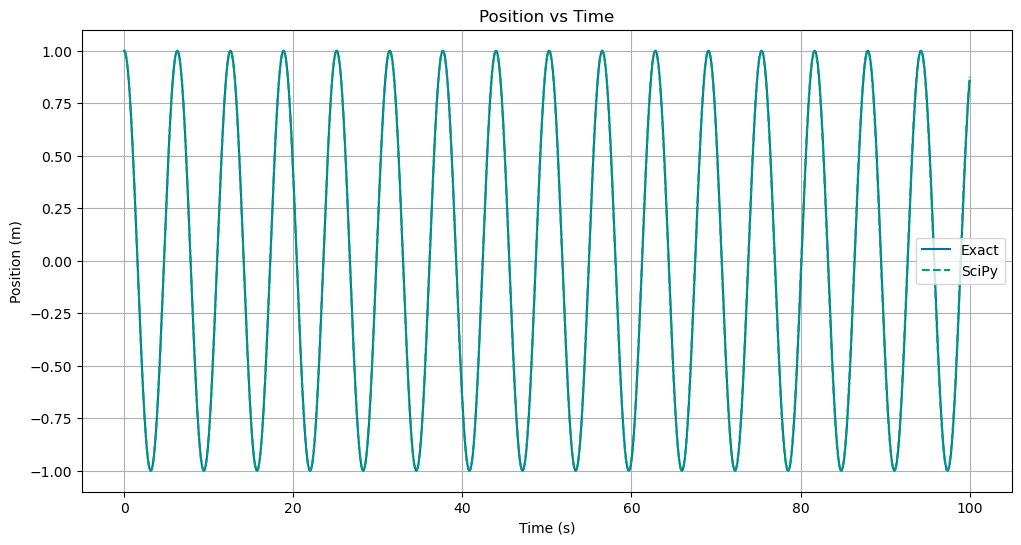

In [24]:
from scipy.integrate import solve_ivp

## Define the simple harmonic oscillator for the solve_ivp function
## Note it expects a particular data structure to be returned
def SHOIVP(t, y, omega):
    x, v = y
    dydt = [v, -omega**2 * x]
    return dydt

## Use the same initial conditions and time parameters
t0 = 0
tf = 100
t = np.linspace(t0, tf, 10000)
y0 = [1, 0]
omega = 1

## Call the solve_ivp function
sol = solve_ivp(SHOIVP, [t0, tf], y0, args=(omega,), t_eval=t)

## Create a DataFrame from the solution
solve_ivpdf = pd.DataFrame({'t': sol.t, 'x': sol.y[0], 'v': sol.y[1]})

## Note the times are not exactly the same
solve_ivpdf.head()

## Plot the solution
plt.figure(figsize=(12, 6))
plt.plot(exactdf['t'], exactdf['x'], label='Exact')
plt.plot(solve_ivpdf['t'], solve_ivpdf['x'], '--', label='SciPy')
plt.title('Position vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.grid(True)
plt.legend();



* 6f (15pt) Using your the integrator of your choosing, find numerical solutions for a given choice of initial conditions for each of the examples in exercise 5. Plot the phase diagram and the numerically computed trajectory on the phase diagram. See the example below for the simple harmonic oscillator. 

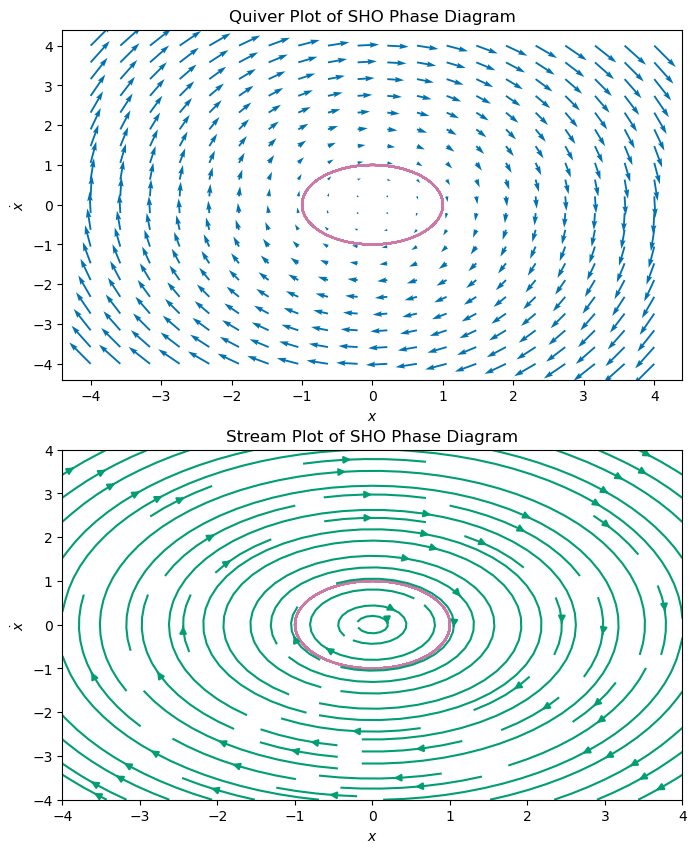

In [33]:
# Generate phase space
x_lim = (-4, 4)
v_lim = (-4, 4)
grid_size = 20
X, V, dX, dV = generate_phase_space(x_lim, v_lim, grid_size)

fig, axs = plt.subplots(2, 1, figsize=(8, 10)) 

# Plot numerical trajectory on the quiver plot
axs[0].plot(solve_ivpdf['x'], solve_ivpdf['v'], label='Sample trajectory', c='C3')

axs[0].quiver(X, V, dX, dV, color='C0')
axs[0].set_title('Quiver Plot of SHO Phase Diagram')
axs[0].set_xlabel(r'$x$')
axs[0].set_ylabel(r'$\dot{x}$')

# Plot numerical trajectory on the quiver plot
axs[1].plot(solve_ivpdf['x'], solve_ivpdf['v'], label='Sample trajectory', c='C3')

axs[1].streamplot(X, V, dX, dV, color='C1')
axs[1].set_title('Stream Plot of SHO Phase Diagram')
axs[1].set_xlabel(r'$x$')
axs[1].set_ylabel(r'$\dot{x}$');

### Extra Credit - Integrating Classwork With Research

This opportunity will allow you to earn up to 5 extra credit points on a Homework per week. These points can push you above 100% or help make up for missed exercises.
In order to earn all points you must:

1. Attend an MSU research talk (recommended research oriented Clubs is  provided below)

2. Summarize the talk using at least 150 words

3. Turn in the summary along with your Homework.

Approved talks:
Talks given by researchers through the following clubs:
* Research and Idea Sharing Enterprise (RAISE)​: Meets Wednesday Nights Society for Physics Students (SPS)​: Meets Monday Nights

* Astronomy Club​: Meets Monday Nights

* Facility For Rare Isotope Beam (FRIB) Seminars: ​Occur multiple times a week